In [1]:
import os
import re
import json
import pickle 
from pathlib import Path
import yaml

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy
import skimage
import pandas as pd
import torch
import torchvision
import torchvision.transforms.functional as TF
import tifffile
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram
from einops import rearrange, repeat

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import mushroom.utils as utils
import mushroom.data.multiplex as multiplex

In [66]:
# directory = Path('/data/estorrs/mushroom/data/projects/submission_v1/IF/HT891Z1_ALDH1A3_full_slide/stitched')
# directory = Path('/data/estorrs/mushroom/data/projects/submission_v1/IF/HT891Z1_ANPEP_full_slide/stitched')
# directory = Path('/data/estorrs/mushroom/data/projects/submission_v1/IF/HT891Z1_GDF15_full_slide/stitched')
directory = Path('/data/estorrs/mushroom/data/projects/submission_v1/IF/HT891Z1_SPP1_full_slide/stitched')

In [67]:
fps = sorted(utils.listfiles(directory, regex=r'.tif$'))
fps = [fp for fp in fps if 'combined' not in fp]
fps

['/data/estorrs/mushroom/data/projects/submission_v1/IF/HT891Z1_SPP1_full_slide/stitched/cd68.tif',
 '/data/estorrs/mushroom/data/projects/submission_v1/IF/HT891Z1_SPP1_full_slide/stitched/dapi.tif',
 '/data/estorrs/mushroom/data/projects/submission_v1/IF/HT891Z1_SPP1_full_slide/stitched/ecad.tif',
 '/data/estorrs/mushroom/data/projects/submission_v1/IF/HT891Z1_SPP1_full_slide/stitched/spp1.tif']

In [68]:
data = []
channels = []
for fp in fps:
    channel = fp.split('/')[-1].replace('.tif', '')
    print(channel)

    rgb = tifffile.imread(fp)
    rgb = rgb.astype(np.float32)
    # rgb /= rgb.max((0, 1), keepdims=True)
    rgb /= rgb.max()
    rgb *= 255
    rgb = rgb.astype(np.uint8)
    gray = skimage.color.rgb2gray(rgb)
    gray *= 255
    gray = gray.astype(np.uint8)

    data.append(gray)
    channels.append(channel)
data = np.stack(data)

multiplex.write_basic_ome_tiff(
    directory / 'combined.ome.tiff',
    data, channels, microns_per_pixel=.51, subresolutions=1
)

cd68
dapi
ecad
spp1


In [52]:
z = tifffile.imread(directory / 'combined.ome.tiff')
z.shape, z.max((0, 1))

((4, 16563, 15364), array([12, 28, 30, ..., 16,  5,  3], dtype=uint8))

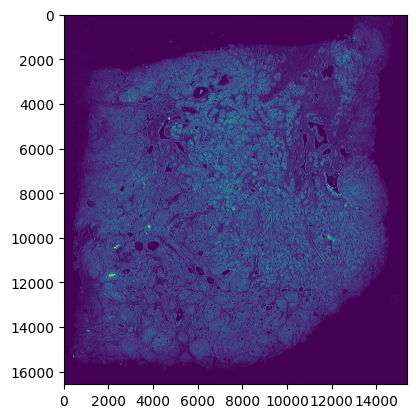

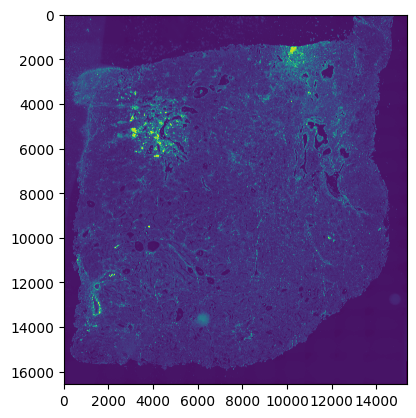

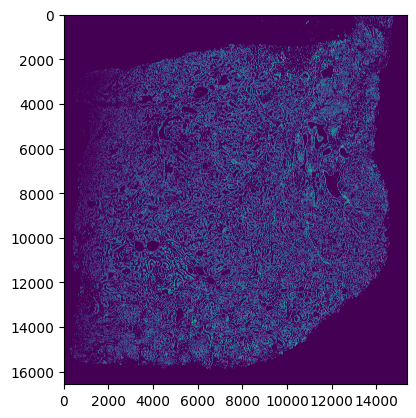

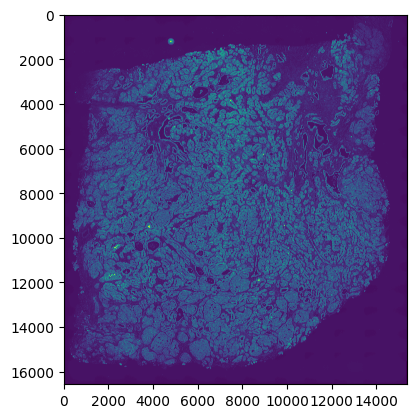

In [53]:
for x in z:
    plt.imshow(x)
    plt.show()